<a href="https://colab.research.google.com/github/ieliasbar/Reviews_classification/blob/master/Alexa_reviews_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONTEXT

Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc.

Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews

# IMPORT LIBRARIES

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
 pass
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import tensorflow as tf

TensorFlow 2.x selected.


In [2]:
print("TensorFlow version: ",tf.__version__)

TensorFlow version:  2.1.0


In [3]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [0]:
nlp = spacy.load('en_core_web_sm')

# DATA ANALYSIS

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_alexa = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/NLP_Class/amazon-alexa.tsv', sep='\t')

In [7]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
df_alexa.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [9]:
df_alexa.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [10]:
df_alexa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


Check if there are missing values

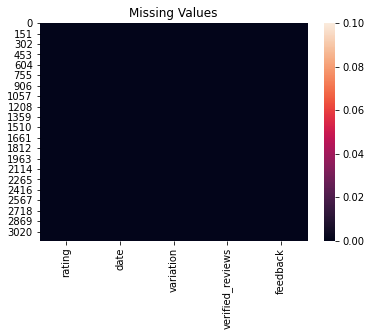

In [11]:
sns.heatmap(df_alexa.isnull(), vmin=0.0, vmax=0.1).set_title("Missing Values")
plt.show()

Text(0.5, 1.0, 'Alexa products ratings')

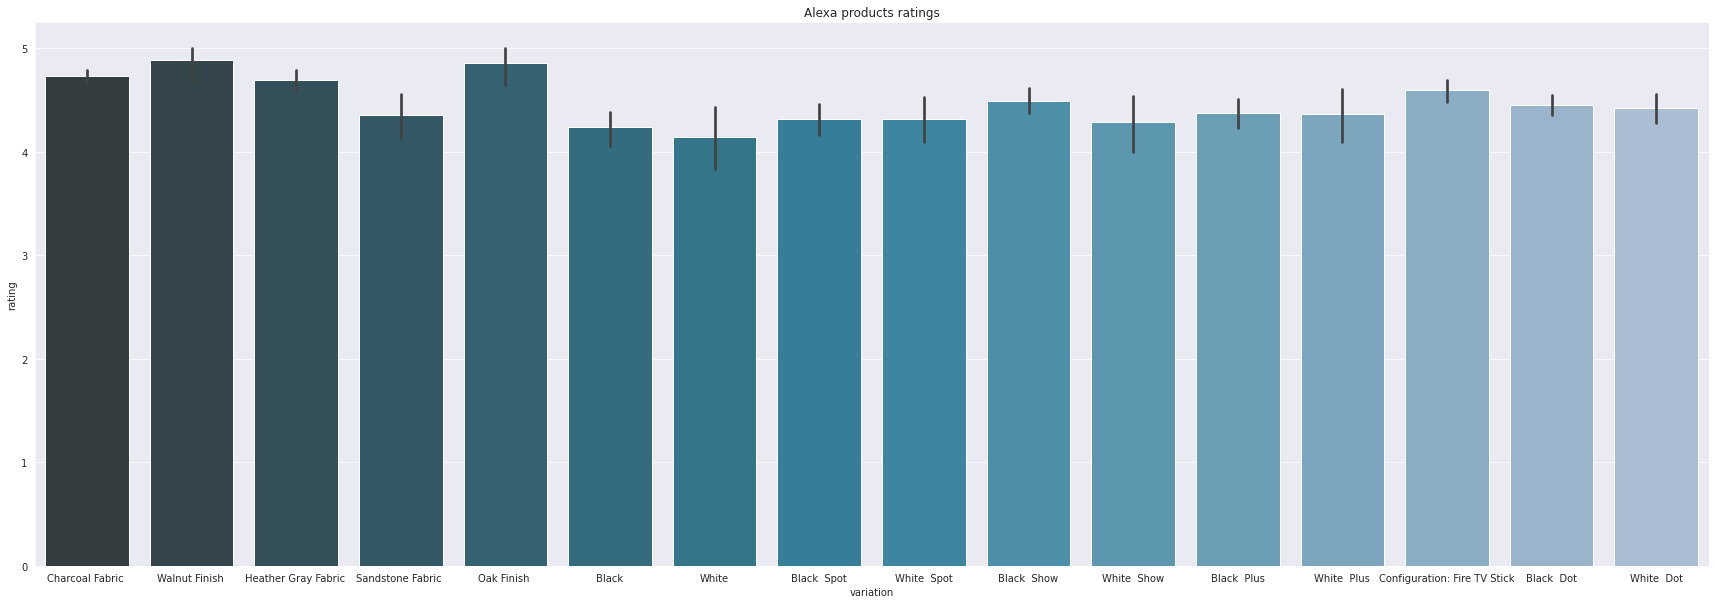

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize = (30,10))
sns.barplot(x = 'variation', y='rating', data=df_alexa, palette='PuBuGn_d').set_title("Alexa products ratings")

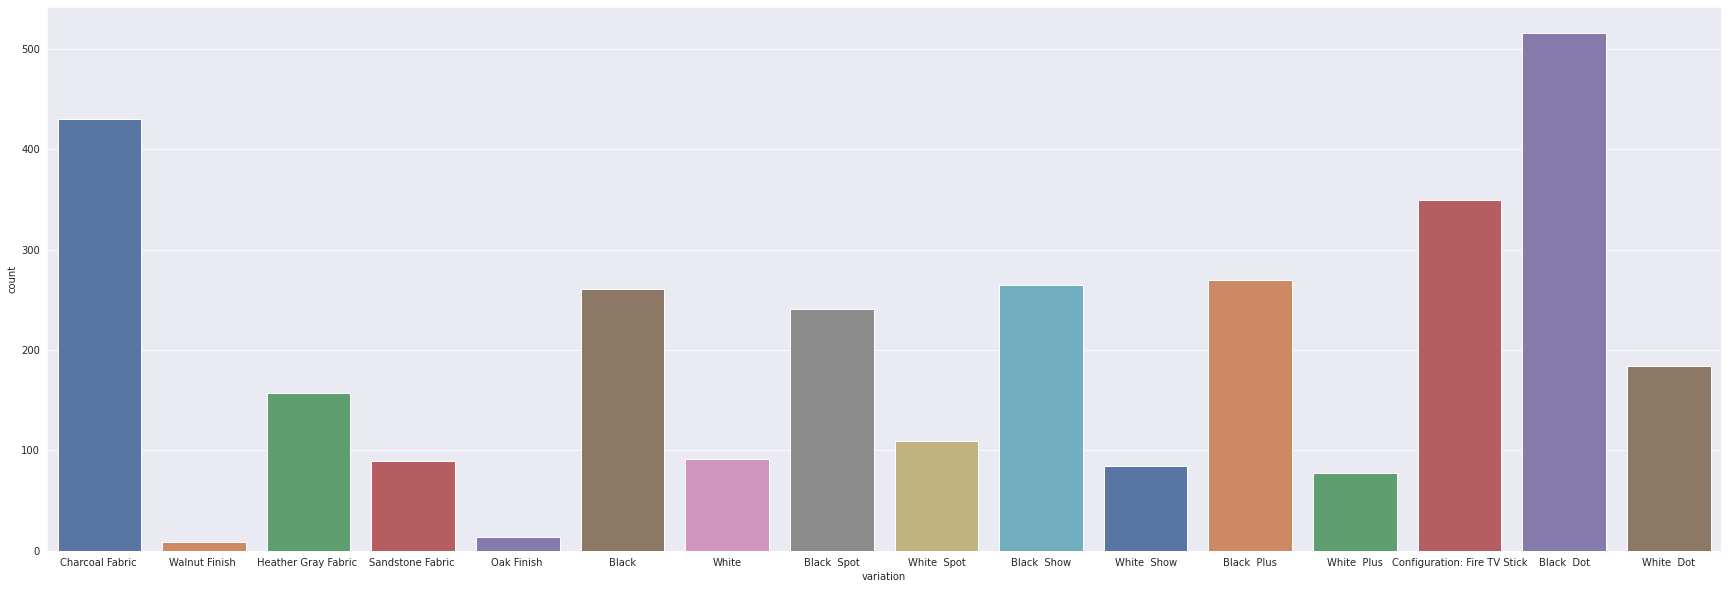

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize = (30,10))
sns.countplot(df_alexa['variation'], label = 'Count', palette='deep')

Postive and Negative reviews:

*   1 = Positive review
*   0 = Negative review



Text(0.5, 1.0, 'Postive and Negative Reviews')

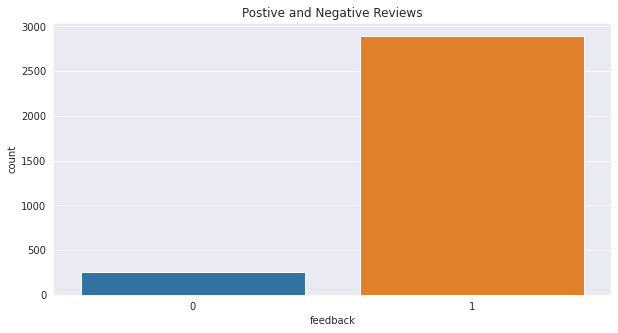

In [14]:
plt.figure(figsize = (10,5))
sns.countplot(df_alexa['feedback'], label = "Count").set_title("Postive and Negative Reviews")

Text(0.5, 1.0, 'Rating count')

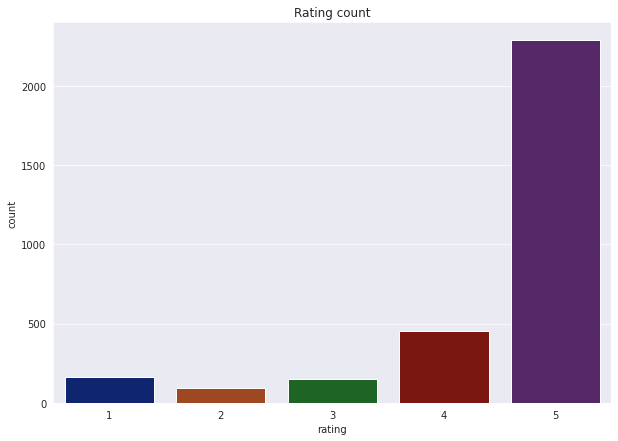

In [15]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'rating', data = df_alexa, palette='dark').set_title("Rating count")

In [16]:
df_alexa['verified_reviews'].head(30)

0                                         Love my Echo!
1                                             Loved it!
2     Sometimes while playing a game, you can answer...
3     I have had a lot of fun with this thing. My 4 ...
4                                                 Music
5     I received the echo as a gift. I needed anothe...
6     Without having a cellphone, I cannot use many ...
7     I think this is the 5th one I've purchased. I'...
8                                           looks great
9     Love it! I’ve listened to songs I haven’t hear...
10    I sent it to my 85 year old Dad, and he talks ...
11    I love it! Learning knew things with it eveyda...
12    I purchased this for my mother who is having k...
13                                   Love, Love, Love!!
14                             Just what I expected....
15                            I love it, wife hates it.
16    Really happy with this purchase.  Great speake...
17    We have only been using Alexa for a couple

In [17]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


Counting the number of characters in each line

In [0]:
df_alexa['num_char'] = df_alexa['verified_reviews'].apply(len)

In [19]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback,num_char
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


Counting the number of words in each example

In [0]:
def word_count(string):
  words = string.split()
  return len(words)

In [0]:
df_alexa['num_words'] = df_alexa['verified_reviews'].apply(word_count)

In [22]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback,num_char,num_words
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,3
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,38
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,34
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1


Distribution of the Alexa products with respect the number of chacarcters

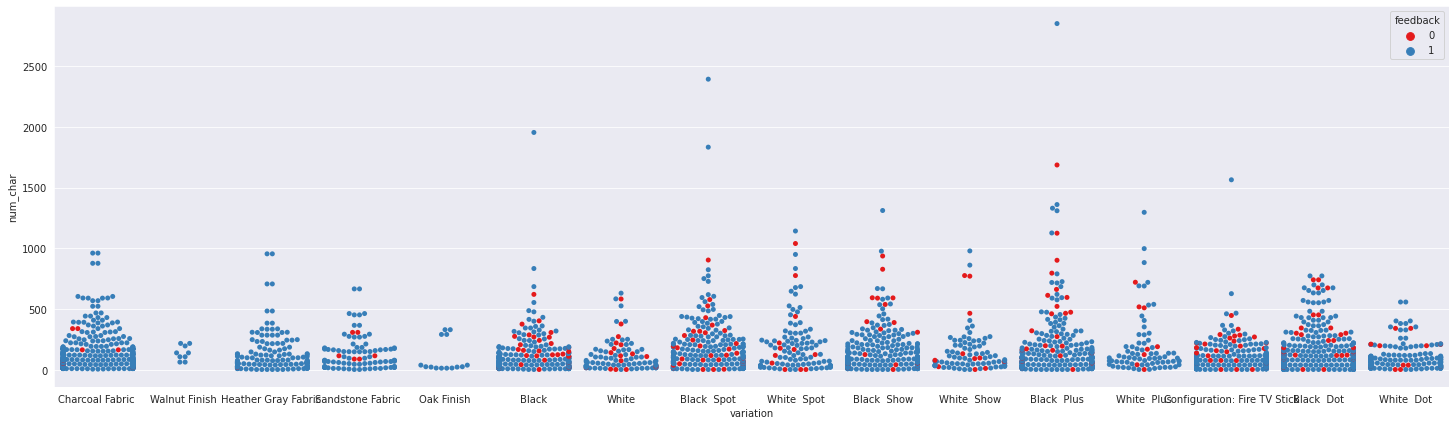

In [23]:
plt.figure(figsize = (25,7))
sns.swarmplot(df_alexa['variation'], df_alexa['num_char'], hue = df_alexa['feedback'],palette = 'Set1')

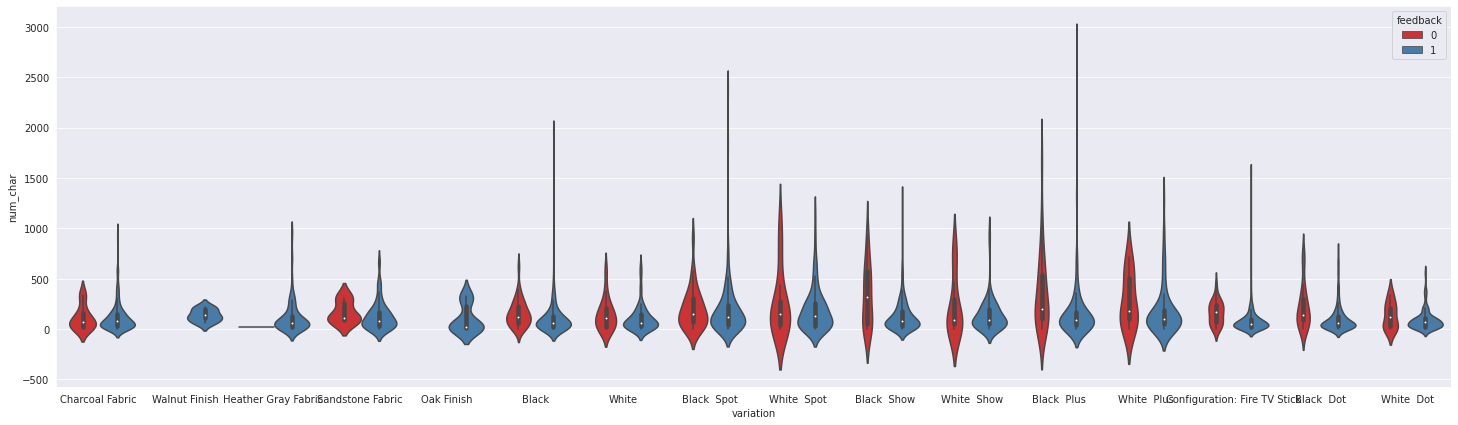

In [24]:
plt.figure(figsize = (25,7))
sns.violinplot(df_alexa['variation'], df_alexa['num_char'], hue = df_alexa['feedback'],palette = 'Set1')

Distribution of Alexa products with respect the number of words

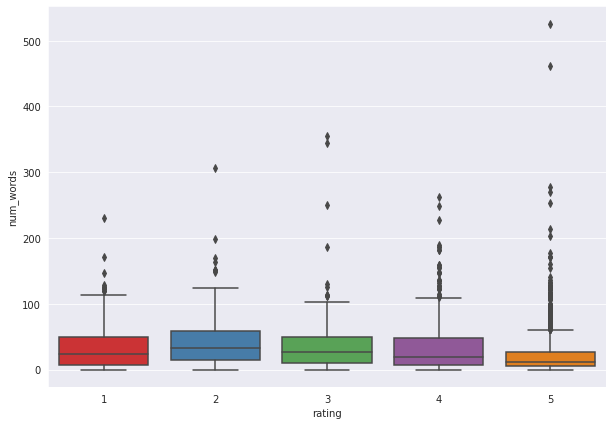

In [25]:
plt.figure(figsize = (10,7))
sns.boxplot(df_alexa['rating'], df_alexa['num_words'],palette = 'Set1')

Mapping the number of words with respect the ratings

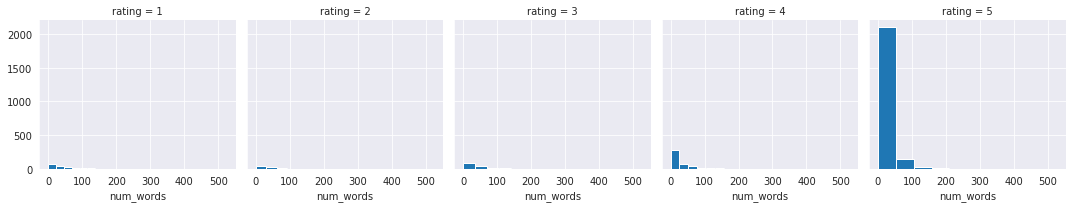

In [26]:
g = sns.FacetGrid(df_alexa,col='rating')
g.map(plt.hist,'num_words')

Comparing the mean of the number of words in the postive and negative reviews

In [0]:
feedbacks = df_alexa.groupby('feedback').mean()

In [28]:
feedbacks

,rating,num_char,num_words
feedback,,,
0,1.373541,215.241245,40.256809
1,4.737643,124.659177,23.963705


Comparing the number of "Proper Nouns", "Nouns" and "Verbs" in the data, to see if there is a difference between positive and negative reviews 

In [0]:
def proper_nouns(text, model = nlp):
  doc = model(text)
  pos = [token.pos_ for token in doc]
  return pos.count('PROPN')

In [0]:
df_alexa['num_propn'] = df_alexa['verified_reviews'].apply(proper_nouns)

In [0]:
def nouns(text, model = nlp):
  doc = model(text)
  pos = [token.pos_ for token in doc]
  return pos.count('NOUN')

In [0]:
df_alexa['num_noun'] = df_alexa['verified_reviews'].apply(nouns)

In [33]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback,num_char,num_words,num_propn,num_noun
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,3,0,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2,0,0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,38,1,4
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,34,0,11
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,0,1


In [34]:
positive_propn = df_alexa[df_alexa['feedback'] == 1]['num_propn'].mean()
negative_propn = df_alexa[df_alexa['feedback'] == 0]['num_propn'].mean()
print('Positive_propn: {:.2f}'.format(positive_propn))
print('Negatuve_propn: {:.2f}'.format(negative_propn))

Positive_propn: 0.99
Negatuve_propn: 1.63


In [35]:
positive_noun = df_alexa[df_alexa['feedback'] == 1]['num_noun'].mean()
negative_noun = df_alexa[df_alexa['feedback'] == 0]['num_noun'].mean()
print('Positive_noun: {:.2f}'.format(positive_noun))
print('Negatuve_noun: {:.2f}'.format(negative_noun))

Positive_noun: 4.12
Negatuve_noun: 6.50


In [0]:
def verb(text, model = nlp):
  doc = model(text)
  pos = [token.pos_ for token in doc]
  return pos.count('VERB')

In [0]:
df_alexa['verb'] = df_alexa['verified_reviews'].apply(verb)

In [38]:
positive_verb = df_alexa[df_alexa['feedback'] == 1]['verb'].mean()
negative_verb = df_alexa[df_alexa['feedback'] == 0]['verb'].mean()
print('Positive_verb: {:.2f}'.format(positive_verb))
print('Negative_verb: {:.2f}'.format(negative_verb))

Positive_verb: 3.75
Negative_verb: 6.77


In [0]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS
def lemma(text, model = nlp):
  doc = nlp(text, disable=['ner','parser'])
  lemmas = [token.lemma_ for token in doc]
  a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords]
  return ' '.join(a_lemmas)

In [0]:
df_alexa['lemma'] = df_alexa['verified_reviews'].apply(lemma)

In [41]:
df_alexa['lemma'].head(20)

0                                             love echo
1                                                  love
2     play game answer question correctly Alexa wron...
3     lot fun thing yr old learn dinosaur control li...
4                                                 music
5     receive echo gift need Bluetooth play music ea...
6     cellphone use feature iPad use great alarm u r...
7     think purchase work room house like feature of...
8                                            look great
9     love listen song hear childhood news weather i...
10                    send year old Dad talk constantly
11    love learn know thing eveyday figure work far ...
12    purchase mother knee problem try come fast lik...
13                                       love Love Love
14                                               expect
15                                       love wife hate
16                happy purchase great speaker easy set
17    use Alexa couple day lot fun new toy like 

In [0]:
df2 = df_alexa.copy()

# DATA CLEANING

In [43]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback,num_char,num_words,num_propn,num_noun,verb,lemma
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,3,0,1,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2,0,0,1,love
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,38,1,4,8,play game answer question correctly Alexa wron...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,34,0,11,4,lot fun thing yr old learn dinosaur control li...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,0,1,0,music


In [0]:
df_alexa = df_alexa.drop(['date', 'rating'],axis=1)

In [0]:
variation_dummies = pd.get_dummies(df_alexa['variation'], drop_first = True)

In [46]:
variation_dummies.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
df_alexa.drop(['variation'], axis=1, inplace=True)

In [0]:
df_alexa = pd.concat([df_alexa, variation_dummies], axis=1)

In [49]:
df_alexa.head()

,verified_reviews,feedback,num_char,num_words,num_propn,num_noun,verb,lemma,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,13,3,0,1,1,love echo,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,9,2,0,0,1,love,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,195,38,1,4,8,play game answer question correctly Alexa wron...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,172,34,0,11,4,lot fun thing yr old learn dinosaur control li...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,5,1,0,1,0,music,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(ngram_range=(1,2))
alexa_tfidf = tfidf_vec.fit_transform(df_alexa['lemma'])

In [51]:
alexa_tfidf.shape

(3150, 20133)

In [0]:
df_alexa.drop(['lemma'], axis = 1, inplace=True)

In [0]:
reviews = pd.DataFrame(alexa_tfidf.toarray())

In [0]:
df_alexa = pd.concat([df_alexa, reviews], axis = 1)

In [55]:
df_alexa.head()

,verified_reviews,feedback,num_char,num_words,num_propn,num_noun,verb,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,...,20093,20094,20095,20096,20097,20098,20099,20100,20101,20102,20103,20104,20105,20106,20107,20108,20109,20110,20111,20112,20113,20114,20115,20116,20117,20118,20119,20120,20121,20122,20123,20124,20125,20126,20127,20128,20129,20130,20131,20132
0,Love my Echo!,1,13,3,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Loved it!,1,9,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Sometimes while playing a game, you can answer...",1,195,38,1,4,8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,I have had a lot of fun with this thing. My 4 ...,1,172,34,0,11,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207226,0.207226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Music,1,5,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
X = df_alexa.drop(['feedback','num_propn','verified_reviews','num_noun','verb','num_char','num_words'], axis = 1)

In [0]:
y = df_alexa['feedback']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 666)

In [59]:
X_train.shape

(2520, 20148)

In [60]:
y_train.shape

(2520,)

# TRAIN ANN

In [0]:
ANN_classifier = tf.keras.models.Sequential()
ANN_classifier.add(tf.keras.layers.Dense(units=200, activation='relu',input_shape = (X_train.shape[1],)))
ANN_classifier.add(tf.keras.layers.Dense(units=200, activation='relu'))
ANN_classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [62]:
ANN_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               4029800   
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 4,070,201
Trainable params: 4,070,201
Non-trainable params: 0
_________________________________________________________________


In [0]:
ANN_classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [64]:
epochs_hist = ANN_classifier.fit(X_train, y_train, epochs = 10)

Train on 2520 samples
Epoch 1/10
2520/2520 [==============================] - 3s 993us/sample - loss: 0.3083 - accuracy: 0.9179
Epoch 2/10
2520/2520 [==============================] - 1s 207us/sample - loss: 0.1148 - accuracy: 0.9183
Epoch 3/10
2520/2520 [==============================] - 1s 207us/sample - loss: 0.0694 - accuracy: 0.9810
Epoch 4/10
2520/2520 [==============================] - 1s 207us/sample - loss: 0.0395 - accuracy: 0.9925
Epoch 5/10
2520/2520 [==============================] - 1s 208us/sample - loss: 0.0217 - accuracy: 0.9901
Epoch 6/10
2520/2520 [==============================] - 1s 205us/sample - loss: 0.0196 - accuracy: 0.9897
Epoch 7/10
2520/2520 [==============================] - 1s 210us/sample - loss: 0.0191 - accuracy: 0.9925
Epoch 8/10
2520/2520 [==============================] - 1s 207us/sample - loss: 0.0189 - accuracy: 0.9909
Epoch 9/10
2520/2520 [==============================] - 1s 209us/sample - loss: 0.0184 - accuracy: 0.9925
Epoch 10/10
2520/2520 [=

# EVALUATE THE MODEL (ANN)

In [65]:
ANN_classifier.evaluate(X_test,y_test)

630/630 [==============================] - 0s 260us/sample - loss: 0.1820 - accuracy: 0.9508


[0.18203116600948666, 0.9507936]

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

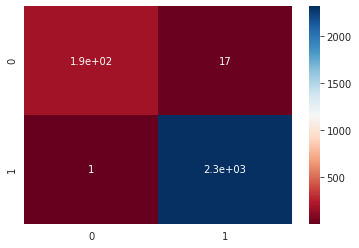

In [67]:
y_pred_train = ANN_classifier.predict(X_train)
y_pred_train

y_pred_train = (y_pred_train > 0.5)

cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, cmap="RdBu")

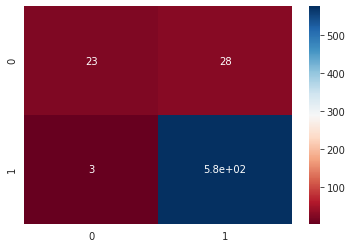

In [68]:
y_pred_test = ANN_classifier.predict(X_test)
y_pred_test

y_pred_test = (y_pred_test > 0.5)

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap="RdBu")

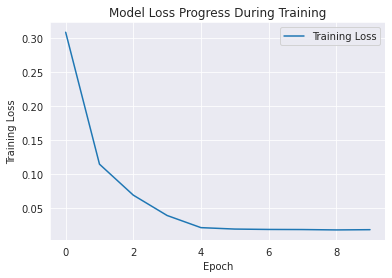

In [69]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

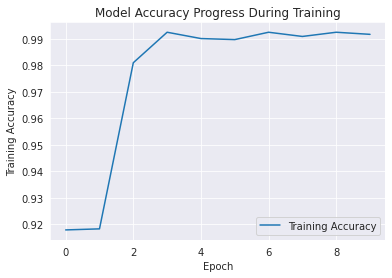

In [70]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

# TRAIN LSTM

In [71]:
df2.head()

,rating,date,variation,verified_reviews,feedback,num_char,num_words,num_propn,num_noun,verb,lemma
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,3,0,1,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2,0,0,1,love
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,38,1,4,8,play game answer question correctly Alexa wron...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,34,0,11,4,lot fun thing yr old learn dinosaur control li...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,0,1,0,music


In [0]:
X = df2['verified_reviews']
y = df2['feedback'].values

In [0]:
y = y.reshape(-1,1)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, stratify = y, random_state = 666)

In [75]:
y_train.shape

(2677, 1)

Process the data:


1.   Build the dictionary of indexes.
2.   Change texts into sequence of indexes.
3.   Pad the sequences (Make all sequences have the same size).





In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
max_words = 5000
max_len = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
texts_numeric = tokenizer.texts_to_sequences(X_train)
texts_pad = pad_sequences(texts_numeric,maxlen=max_len)

In [77]:
texts_pad.shape

(2677, 500)

In [78]:
y_train.shape

(2677, 1)

In [0]:
from tensorflow.keras.layers import Dense, LSTM, Input, Dropout, Activation, Embedding, Conv1D, MaxPooling1D, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
# RNN MODEL
RNN_classifier = tf.keras.models.Sequential()
RNN_classifier.add(Embedding(max_words, 50, input_length=max_len))
RNN_classifier.add(Conv1D(filters = 32, kernel_size = 3, padding ='same'))
RNN_classifier.add(MaxPooling1D())
RNN_classifier.add(LSTM(128, return_sequences=False, recurrent_dropout=0.15))
RNN_classifier.add(Dropout(0.2))
RNN_classifier.add(Dense(32, activation='relu'))
RNN_classifier.add(Dense(1, activation='sigmoid'))

In [80]:
RNN_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 50)           250000    
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 32)           4832      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               82432     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [0]:
RNN_classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [82]:
historyRNN = RNN_classifier.fit(texts_pad, y_train, epochs=10, batch_size = 32)

Train on 2677 samples
Epoch 1/10
2677/2677 [==============================] - 39s 14ms/sample - loss: 0.3236 - accuracy: 0.9111
Epoch 2/10
2677/2677 [==============================] - 33s 12ms/sample - loss: 0.1949 - accuracy: 0.9350
Epoch 3/10
2677/2677 [==============================] - 33s 12ms/sample - loss: 0.0736 - accuracy: 0.9753
Epoch 4/10
2677/2677 [==============================] - 32s 12ms/sample - loss: 0.0409 - accuracy: 0.9862
Epoch 5/10
2677/2677 [==============================] - 33s 12ms/sample - loss: 0.0410 - accuracy: 0.9873
Epoch 6/10
2677/2677 [==============================] - 33s 12ms/sample - loss: 0.0221 - accuracy: 0.9929
Epoch 7/10
2677/2677 [==============================] - 33s 12ms/sample - loss: 0.0178 - accuracy: 0.9940
Epoch 8/10
2677/2677 [==============================] - 33s 12ms/sample - loss: 0.0174 - accuracy: 0.9940
Epoch 9/10
2677/2677 [==============================] - 33s 12ms/sample - loss: 0.0147 - accuracy: 0.9940
Epoch 10/10
2677/2677 [=

# EVALUATE THE MODEL (RNN)

In [0]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [85]:
accr_test = RNN_classifier.evaluate(test_sequences_matrix,y_test)
print('Accuracy test: ', accr_test[1])

473/473 [==============================] - 2s 3ms/sample - loss: 0.3062 - accuracy: 0.9408
Accuracy test:  0.9408034


In [0]:
y_pred_test_RNN = RNN_classifier.predict(test_sequences_matrix)

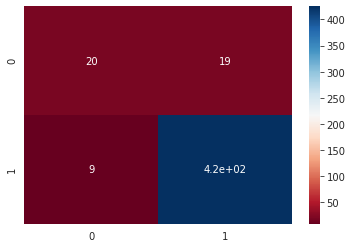

In [87]:
y_pred_test_RNN = (y_pred_test_RNN > 0.5)

cm = confusion_matrix(y_test, y_pred_test_RNN)
sns.heatmap(cm, annot=True, cmap="RdBu")

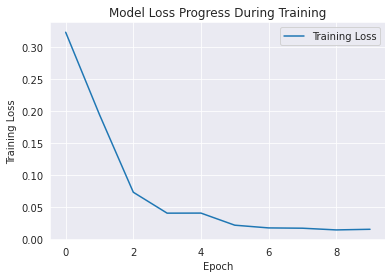

In [88]:
plt.plot(historyRNN.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

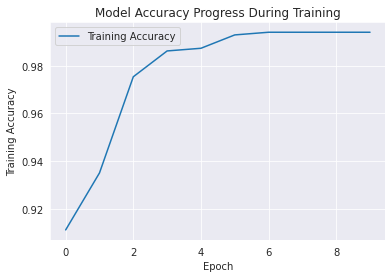

In [89]:
plt.plot(historyRNN.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])